In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
arezaei81_heartcsv_path = kagglehub.dataset_download('arezaei81/heartcsv')

print('Data source import complete.')


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load



# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heartcsv/heart.csv


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns


In [ ]:
df = pd.read_csv("/kaggle/input/heartcsv/heart.csv")

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


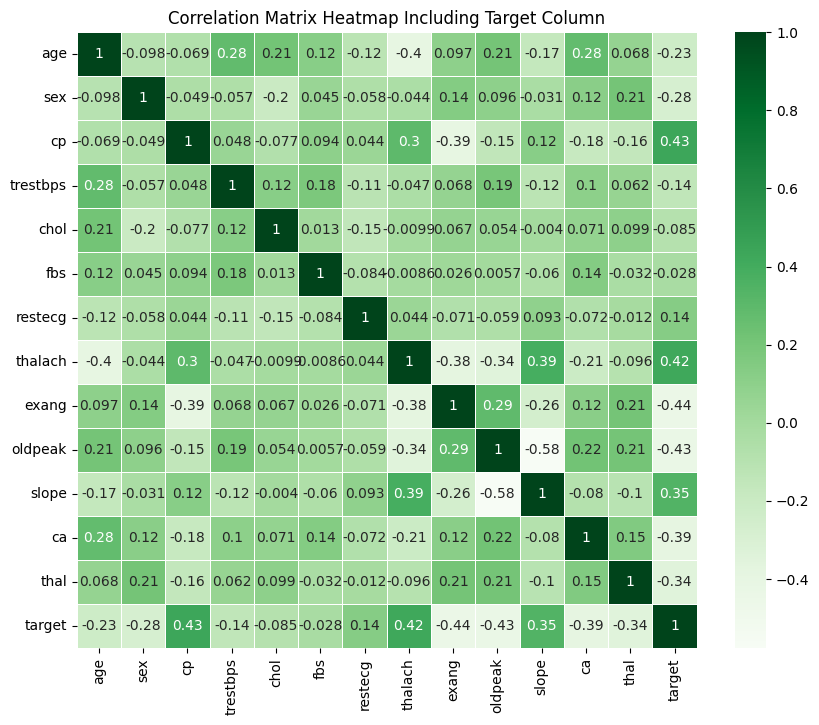

In [ ]:
correlation_matrix = df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix,annot=True,cmap='Greens', linewidths=0.5)
plt.title('Correlation Matrix Heatmap Including Target Column')
plt.show()

In [ ]:
X = df.drop(columns=["target"])
Y = df["target"]

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42,stratify=Y)

In [ ]:
print("X TRAIN",X_train.shape)
print("X ",X.shape)

X TRAIN (242, 13)
X  (303, 13)


## Logistic Regression

In [ ]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train,Y_train)
Y_pred = model.predict(X_test)
logistic_regression_accuracy = accuracy_score(Y_test,Y_pred)
# print(accuracy) #88% without Stratify

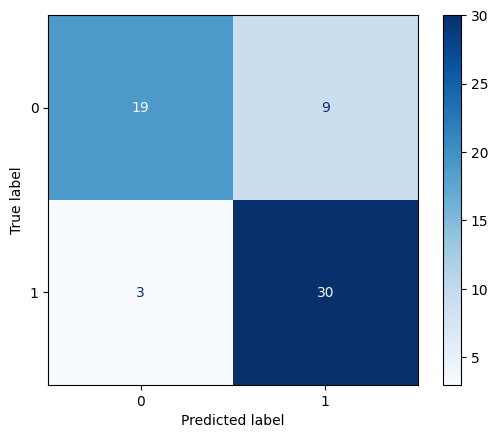

In [ ]:
conf_matrix=confusion_matrix(Y_test,Y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [ ]:
print("TRAIN Y COUNT : ",Y_train.value_counts())

TRAIN Y COUNT :  target
1    132
0    110
Name: count, dtype: int64


In [ ]:
print("TEST Y COUNT:",Y_test.value_counts())

TEST Y COUNT: target
1    33
0    28
Name: count, dtype: int64


## Random Forest Tree Classification

In [ ]:
model = RandomForestClassifier()
model.fit(X_train,Y_train)
Y_pred = model.predict(X_test)
random_forest_accuracy = accuracy_score(Y_test,Y_pred)
print(random_forest_accuracy) #88% without Stratify


0.819672131147541


In [ ]:
single_sample = [X_test.iloc[0].values]
prediction = model.predict(single_sample)
print(prediction)

[0]


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
import lime
import lime.lime_tabular

In [ ]:
print(X.shape[1])
explainer = lime.lime_tabular.LimeTabularExplainer(
    X_train.values,
    feature_names=X_train.columns,
    class_names=['Class 0', 'Class 1'],  # Change based on your class names
    mode='classification'
)

13


In [ ]:
instance_idx = 0
instance = X_test.iloc[instance_idx].values
print(instance)
print(Y_test[0])

[ 57.    1.    0.  150.  276.    0.    0.  112.    1.    0.6   1.    1.
   1. ]
1


In [ ]:
explanation = explainer.explain_instance(instance, model.predict_proba, num_features=X.shape[1])

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
# Display the explanation
explanation.show_in_notebook()  # If using a Jupyter Notebook
explanation.save_to_file('lime_explanation.html')

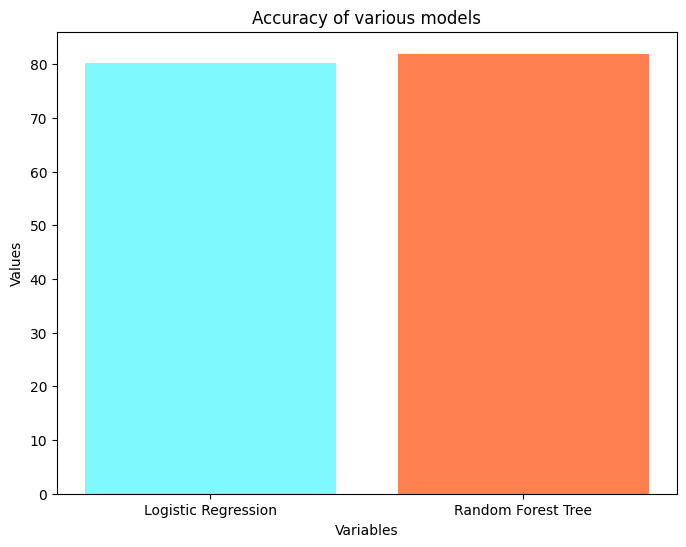

In [ ]:
values=[logistic_regression_accuracy,random_forest_accuracy]
labels=["Logistic Regression","Random Forest Tree"]
plt.figure(figsize=(8, 6))
plt.bar(labels, [i*100 for i in values], color=['#7DF9FF', '#FF7F50'])

# Add title and labels
plt.title('Accuracy of various models')
plt.xlabel('Variables')
plt.ylabel('Values')

# Show the plot
plt.show()